# Import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import bnltk
# from bnlp import NLTKTokenizer
from bltk.langtools import Tokenizer
from bltk.langtools import remove_stopwords
# from bangla_stemmer.stemmer import stemmer
import re

In [3]:
# !pip install wordcloud
# !pip install bnltk
# !pip install bnlp_toolkit
# !pip install bnlp
# !pip install -U bnlp_toolkit
# !pip install bltk

# Read data

In [4]:
data=pd.read_excel('data/data1.xlsx')
for i in range(2,46):
    d=pd.read_excel('data/data'+str(i)+'.xlsx')
    data=pd.concat([data,d],axis=0,ignore_index=True)

df=data.copy()

In [5]:
df.head()

,Name,Comment,Label
0,মোহাম্মদ সোহেল রানা,খেললো কানাডাজিতলো লেংড়াডা,3.0
1,Preetom Mazumder,"Like I said, World Cup of Goalkeepers",NaN
2,Mizanur Rahman Rupok,Well played Canada 🇨🇦🇨🇦🇨🇦 bed luck..,NaN
3,Mohammed Ahmad,"৫০ধাপ নিচের দল থেকে হারের পর ও যারা চেঁচায়, তা...",3.0
4,Tarek Aziz,কানাডার ভাগ্য খারাপ না হয় বেলজিয়ামের খারাপ খবর...,2.0


In [6]:
df.shape

(3601, 3)

# Preprocessing

In [7]:
# remove the rows with null values in label column
df=df[df['Label'].notna()]

In [8]:
df.shape

(2680, 3)

In [9]:
# add new column length to store the length of each comment
df['length']=df['Comment'].apply(len)
df.shape

(2680, 4)

In [10]:
df.head()

,Name,Comment,Label,length
0,মোহাম্মদ সোহেল রানা,খেললো কানাডাজিতলো লেংড়াডা,3.0,25
3,Mohammed Ahmad,"৫০ধাপ নিচের দল থেকে হারের পর ও যারা চেঁচায়, তা...",3.0,75
4,Tarek Aziz,কানাডার ভাগ্য খারাপ না হয় বেলজিয়ামের খারাপ খবর...,2.0,146
5,Parvej Sheikh,তবে খেলা ভালো হয়েছে।।,2.0,21
6,এইচ আর আবির,অভিনন্দন প্রিয় বেলজিয়াম 🇧🇪❤️তবে আরো ভালো খেল...,2.0,71


In [11]:
#delete the rows with length less equal to 0
df=df[df['length']>0]

In [12]:
df.shape

(2680, 4)

In [13]:
#delete length column
df.drop('length',axis=1,inplace=True)
df.shape

(2680, 3)

Removing English Word

In [14]:
def remove_stopwords(text):
    text = re.sub('[^\u0980-\u09FF]',' ',str(text))
    return text
df['Comment'] = df['Comment'].apply(remove_stopwords)
# def stopwords_removeal(df):
    
# df.head()

Tokenize

In [15]:
# def tokenize_words(df):
tokenizer = Tokenizer()
df['tokenized_comment']=df['Comment'].apply(tokenizer.word_tokenizer)
# df.head()

drop the Name column

In [16]:
# def drop_name(df):
df.drop('Name',axis=1,inplace=True)
# df.head()

Label modification

In [17]:
df['Label'].value_counts()

1.0    1110
3.0     553
2.0     434
6.0     402
7.0      74
5.0      69
4.0      38
Name: Label, dtype: int64

In [18]:
#drop rows with Label=7
df=df[df['Label']!=7]
df['Label'].value_counts()

1.0    1110
3.0     553
2.0     434
6.0     402
5.0      69
4.0      38
Name: Label, dtype: int64

In [19]:
df.shape

(2606, 3)

In [20]:
#change Label 4 and 5 to 2
df['Label']=df['Label'].replace(4,2)
df['Label']=df['Label'].replace(5,2)
df['Label'].value_counts()

1.0    1110
3.0     553
2.0     541
6.0     402
Name: Label, dtype: int64

In [21]:
#re label them from 1 to 4
df['Label']=df['Label'].replace(1,0)
df['Label']=df['Label'].replace(2,1)
df['Label']=df['Label'].replace(3,2)
df['Label']=df['Label'].replace(6,3)
df['Label'].value_counts()

0.0    1110
2.0     553
1.0     541
3.0     402
Name: Label, dtype: int64

In [22]:
#make a new column sentiment where if Label=0 then put "statement" else if Label=1 then put "criticism" else if Label=2 then put "offensive" else if Label=3 then put "funny/sarcasm"
df['sentiment']=df['Label'].apply(lambda x: 'statement' if x==0 else ('criticism' if x==1 else ('offensive' if x==2 else 'funny/sarcasm')))
#reset the index
df.reset_index(drop=True,inplace=True)
df.head()

,Comment,Label,tokenized_comment,sentiment
0,খেললো কানাডাজিতলো লেংড়াডা,2.0,"[খেললো, কানাডাজিতলো, লেংড়াডা]",offensive
1,৫০ধাপ নিচের দল থেকে হারের পর ও যারা চেঁচায় তা...,2.0,"[৫০ধাপ, নিচের, দল, থেকে, হারের, পর, ও, যারা, চ...",offensive
2,কানাডার ভাগ্য খারাপ না হয় বেলজিয়ামের খারাপ খবর...,1.0,"[কানাডার, ভাগ্য, খারাপ, না, হয়, বেলজিয়ামের, খা...",criticism
3,তবে খেলা ভালো হয়েছে,1.0,"[তবে, খেলা, ভালো, হয়েছে]",criticism
4,অভিনন্দন প্রিয় বেলজিয়াম তবে আরো ভালো খেল...,1.0,"[অভিনন্দন, প্রিয়, বেলজিয়াম, তবে, আরো, ভালো, ...",criticism


In [23]:
#using tokenized_comment determine the frequency of each word in each sentiment
from collections import Counter
statement=[]
criticism=[]
offensive=[]
funny=[]
for i in range(len(df)):
    if df['sentiment'][i]=='statement':
        statement+=df['tokenized_comment'][i]
    elif df['sentiment'][i]=='criticism':
        criticism+=df['tokenized_comment'][i]
    elif df['sentiment'][i]=='offensive':
        offensive+=df['tokenized_comment'][i]
    else:
        funny+=df['tokenized_comment'][i]
statement=Counter(statement)
criticism=Counter(criticism)
offensive=Counter(offensive)
funny=Counter(funny)
# print the top 10 words in each sentiment
print('statement:',statement.most_common(10))
print('criticism:',criticism.most_common(10))
print('offensive:',offensive.most_common(10))
print('funny:',funny.most_common(10))

statement: [('না', 141), ('টি', 98), ('এ', 88), ('আর্জেন্টিনা', 85), ('১৬', 85), ('বার', 84), ('ব্রাজিল', 74), ('গোলে', 71), ('সেলিব্রেশন', 71), ('হবে', 68)]
criticism: [('না', 152), ('করে', 95), ('ভালো', 78), ('আর', 77), ('কি', 75), ('খেলা', 57), ('এই', 53), ('জন্য', 45), ('মেসি', 44), ('হবে', 43)]
offensive: [('না', 98), ('আর', 64), ('করে', 57), ('কি', 47), ('এই', 42), ('হয়', 38), ('তো', 32), ('মেসি', 29), ('গেলে', 27), ('কিছু', 26)]
funny: [('না', 79), ('করে', 48), ('আর', 42), ('আর্জেন্টিনা', 40), ('কি', 30), ('হবে', 30), ('ব্রাজিল', 27), ('মনে', 25), ('দিয়ে', 24), ('তো', 21)]


In [24]:
# make a new dataframe with columns word,statement,criticism,offensive,funny
df1=pd.DataFrame(columns=['word','statement','criticism','offensive','funny'])
df1['word']=statement.keys()
df1['statement']=df1['word'].apply(lambda x: statement[x])
df1['criticism']=df1['word'].apply(lambda x: criticism[x])
df1['offensive']=df1['word'].apply(lambda x: offensive[x])
df1['funny']=df1['word'].apply(lambda x: funny[x])
#divide the values of each column by the total number of words in that sentiment
df1['statement']=df1['statement']/sum(statement.values())
df1['criticism']=df1['criticism']/sum(criticism.values())
df1['offensive']=df1['offensive']/sum(offensive.values())
df1['funny']=df1['funny']/sum(funny.values())
#calculate the sum of each row and store it in a new column sum
df1['sum']=df1['statement']+df1['criticism']+df1['offensive']+df1['funny']
#now divide each column by the sum column and multiply by 100
df1['statement']=df1['statement']/df1['sum']*100
df1['criticism']=df1['criticism']/df1['sum']*100
df1['offensive']=df1['offensive']/df1['sum']*100
df1['funny']=df1['funny']/df1['sum']*100
#drop the sum column
df1.drop('sum',axis=1,inplace=True)
#sort the dataframe by the offensive column
df1=df1.sort_values(by='offensive',ascending=False)
df1.head(50)

,word,statement,criticism,offensive,funny
1253,আবাল,4.036309,0.000000,95.963691,0.000000
1630,বাল,4.735431,0.000000,95.264569,0.000000
3105,নে,12.025852,0.000000,87.974148,0.000000
59,হালায়,12.025852,0.000000,87.974148,0.000000
2350,মিশন,5.976684,6.579413,87.443902,0.000000
2600,তেমনি,15.416481,0.000000,84.583519,0.000000
96,তারে,15.416481,0.000000,84.583519,0.000000
1909,শক্ত,15.416481,0.000000,84.583519,0.000000
1304,আজব,15.416481,0.000000,84.583519,0.000000
1140,পিছনে,15.416481,0.000000,84.583519,0.000000


In [25]:
testing_sentence="আবাল কষ্ট"
#tokenize the sentence
testing_sentence=tokenizer.word_tokenizer(testing_sentence)
pred_statement=0
pred_criticism=0
pred_offensive=0
pred_funny=0
for i in range(len(testing_sentence)):
    #if the word is not in the dataframe then add it with 0 values
    if testing_sentence[i] not in df1['word'].values:
        df1.loc[len(df1.index)]=[testing_sentence[i],0,0,0,0]
    #add the values of the word to the prediction
    pred_statement+=df1[df1['word']==testing_sentence[i]]['statement'].values[0]
    pred_criticism+=df1[df1['word']==testing_sentence[i]]['criticism'].values[0]
    pred_offensive+=df1[df1['word']==testing_sentence[i]]['offensive'].values[0]
    pred_funny+=df1[df1['word']==testing_sentence[i]]['funny'].values[0]
#find the maximum value and print the sentiment
if max(pred_statement,pred_criticism,pred_offensive,pred_funny)==pred_statement:
     print('statement')
elif max(pred_statement,pred_criticism,pred_offensive,pred_funny)==pred_criticism:
    print('criticism')
elif max(pred_statement,pred_criticism,pred_offensive,pred_funny)==pred_offensive:
    print('offensive')
else:
    print('funny')   
#print the values of each sentiment
print('statement:',pred_statement)
print('criticism:',pred_criticism)
print('offensive:',pred_offensive)
print('funny:',pred_funny)

offensive
statement: 29.30154994299812
criticism: 6.95328953185478
offensive: 119.06692069665635
funny: 44.67823982849074


In [26]:
#write a full preprocessing function
def remove_stopwords(text):
    text = re.sub('[^\u0980-\u09FF]',' ',str(text))
    return text

def pre_processing(df):
    df=df[df['Label'].notna()] #drop the rows with Label==nan
    df['length']=df['Comment'].apply(len) #length of the comments
    df['Comment'] = df['Comment'].apply(remove_stopwords) #remove the stopwords
    tokenizer = Tokenizer()
    df['tokenized_comment']=df['Comment'].apply(tokenizer.word_tokenizer) #tokenize the comments
    # df.drop('Name',axis=1,inplace=True) #drop the name column
    df=df[df['Label']!=7] #drop the rows with Label==7
    df['Label'].replace({4:2,5:2},inplace=True) #change the label 4,5 to 2
    df = df.sample(frac=1).reset_index(drop=True) #shuffle the data
    #re label them from 1 to 4
    df['Label']=df['Label'].replace(1,0)
    df['Label']=df['Label'].replace(2,1)
    df['Label']=df['Label'].replace(3,2)
    df['Label']=df['Label'].replace(6,3)
    # print(df['Label'].value_counts())
    #make a new column sentiment where if Label=0 then put "statement" else if Label=1 then put "criticism" else if Label=2 then put "offensive" else if Label=3 then put "funny/sarcasm"
    df['sentiment']=df['Label'].apply(lambda x: 'statement' if x==0 else ('criticism' if x==1 else ('offensive' if x==2 else 'funny/sarcasm')))
    #reset the index
    df.reset_index(drop=True,inplace=True)
    #using tokenized_comment determine the frequency of each word in each sentiment
    from collections import Counter
    statement=[]
    criticism=[]
    offensive=[]
    funny=[]
    for i in range(len(df)):
        if df['sentiment'][i]=='statement':
            statement+=df['tokenized_comment'][i]
        elif df['sentiment'][i]=='criticism':
            criticism+=df['tokenized_comment'][i]
        elif df['sentiment'][i]=='offensive':
            offensive+=df['tokenized_comment'][i]
        else:
            funny+=df['tokenized_comment'][i]
    statement=Counter(statement)
    criticism=Counter(criticism)
    offensive=Counter(offensive)
    funny=Counter(funny)
    # print('statement:',len(statement))
    # print('criticism:',len(criticism))
    # print('offensive:',len(offensive))
    # print('funny:',len(funny))
    # make a new dataframe with columns word,statement,criticism,offensive,funny
    df1=pd.DataFrame(columns=['word','statement','criticism','offensive','funny'])
    df1['word']=statement.keys()
    df1['statement']=df1['word'].apply(lambda x: statement[x])
    df1['criticism']=df1['word'].apply(lambda x: criticism[x])
    df1['offensive']=df1['word'].apply(lambda x: offensive[x])
    df1['funny']=df1['word'].apply(lambda x: funny[x])
    #divide the values of each column by the total number of words in that sentiment
    df1['statement']=df1['statement']/sum(statement.values())
    df1['criticism']=df1['criticism']/sum(criticism.values())
    df1['offensive']=df1['offensive']/sum(offensive.values())
    df1['funny']=df1['funny']/sum(funny.values())
    #calculate the sum of each row and store it in a new column sum
    df1['sum']=df1['statement']+df1['criticism']+df1['offensive']+df1['funny']
    #now divide each column by the sum column and multiply by 100
    df1['statement']=df1['statement']/df1['sum']*100
    df1['criticism']=df1['criticism']/df1['sum']*100
    df1['offensive']=df1['offensive']/df1['sum']*100
    df1['funny']=df1['funny']/df1['sum']*100
    #drop the sum column
    df1.drop('sum',axis=1,inplace=True)
    #sort the dataframe by the offensive column
    df1=df1.sort_values(by='offensive',ascending=False)
    return df,df1

In [27]:
df,df1=pre_processing(data)

C:\Users\aniki\AppData\Local\Temp/ipykernel_7452/1092733600.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['length']=df['Comment'].apply(len) #length of the comments
C:\Users\aniki\AppData\Local\Temp/ipykernel_7452/1092733600.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Comment'] = df['Comment'].apply(remove_stopwords) #remove the stopwords
C:\Users\aniki\AppData\Local\Temp/ipykernel_7452/1092733600.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [28]:
df.head()

,Name,Comment,Label,length,tokenized_comment,sentiment
0,Sajol Patra,সেজনি মানুষ হিসাবেও দেখছি অনেক সুন্দর মনের মান...,1.0,51,"[সেজনি, মানুষ, হিসাবেও, দেখছি, অনেক, সুন্দর, ম...",criticism
1,Md Kalam Sheikh.,হতাশ আমি খুব হতাশ,0.0,20,"[হতাশ, আমি, খুব, হতাশ]",statement
2,Bristy Dey,আর্জেন্টিনা খেলা শুরুর আগেই আপনারা এত নিউজ শুর...,1.0,88,"[আর্জেন্টিনা, খেলা, শুরুর, আগেই, আপনারা, এত, ন...",criticism
3,Jonaed Ahamad,বেশি অভিনয় করতে গেলে যা হয়,1.0,30,"[বেশি, অভিনয়, করতে, গেলে, যা, হয়]",criticism
4,Md. Rasel Farazy,২০১৪ সালে পেনাল্টি মিসও করে ছিল মেসি ভুলে যাব...,0.0,50,"[২০১৪, সালে, পেনাল্টি, মিসও, করে, ছিল, মেসি, ভ...",statement


In [29]:
df1.head()

,word,statement,criticism,offensive,funny
1855,আবাল,4.036309,0.000000,95.963691,0.0
1480,বাল,4.735431,0.000000,95.264569,0.0
1810,হালায়,12.025852,0.000000,87.974148,0.0
1684,নে,12.025852,0.000000,87.974148,0.0
660,মিশন,5.976684,6.579413,87.443902,0.0


In [30]:
#keep only label and tokenized_comment columns in df
df=df[['Label','tokenized_comment']]
df.head()

,Label,tokenized_comment
0,1.0,"[সেজনি, মানুষ, হিসাবেও, দেখছি, অনেক, সুন্দর, ম..."
1,0.0,"[হতাশ, আমি, খুব, হতাশ]"
2,1.0,"[আর্জেন্টিনা, খেলা, শুরুর, আগেই, আপনারা, এত, ন..."
3,1.0,"[বেশি, অভিনয়, করতে, গেলে, যা, হয়]"
4,0.0,"[২০১৪, সালে, পেনাল্টি, মিসও, করে, ছিল, মেসি, ভ..."


In [31]:
#train test split. 80% for training and 20% for testing
df_train=df[:int(len(df)*0.8)]
df_test=df[int(len(df)*0.8):]
# X_train=df_train['tokenized_comment']
# y_train=df_train['Label']
# X_test=df_test['tokenized_comment']
# y_test=df_test['Label']

In [32]:
#do preprocessing on the training data
X_train,prep_train=pre_processing(df_train)

KeyError: 'Comment'

In [ ]:
X_train.head()

,Name,Comment,Label,length,tokenized_comment,sentiment
0,Pronobash Biswas Pronobash,কোনো দলকে ছোট করে দেখলে যা হয়,1.0,30,"[কোনো, দলকে, ছোট, করে, দেখলে, যা, হয়]",criticism
1,Arafin Islam Shamim,ব্রাজিলের সার্বিয়ার উপর গোয়েন্দাগিরি করা লাগে ...,0.0,83,"[ব্রাজিলের, সার্বিয়ার, উপর, গোয়েন্দাগিরি, করা,...",statement
2,MD Miaj Uddin,চোরের মার বড় গলা,2.0,41,"[চোরের, মার, বড়, গলা]",offensive
3,Sujan Mozumder Shibu,মিছা কথা ভাই আপনার ক্রাস,1.0,44,"[মিছা, কথা, ভাই, আপনার, ক্রাস]",criticism
4,এইচ আর আবির,অভিনন্দন প্রিয় বেলজিয়াম তবে আরো ভালো খেল...,1.0,71,"[অভিনন্দন, প্রিয়, বেলজিয়াম, তবে, আরো, ভালো, ...",criticism


In [ ]:
prep_train.head()

,word,statement,criticism,offensive,funny
1070,বাল,5.907983,0.000000,94.092017,0.0
2219,আবাল,5.907983,0.000000,94.092017,0.0
911,মিশন,6.820046,8.699478,84.480477,0.0
601,দেখলেই,15.851000,0.000000,84.149000,0.0
1533,বচ,15.851000,0.000000,84.149000,0.0


In [ ]:
def pre_processing_test(df):
    df=df[df['Label'].notna()] #drop the rows with Label==nan
    df['length']=df['Comment'].apply(len) #length of the comments
    df['Comment'] = df['Comment'].apply(remove_stopwords) #remove the stopwords
    tokenizer = Tokenizer()
    df['tokenized_comment']=df['Comment'].apply(tokenizer.word_tokenizer) #tokenize the comments
    # df.drop('Name',axis=1,inplace=True) #drop the name column
    df=df[df['Label']!=7] #drop the rows with Label==7
    df['Label'].replace({4:2,5:2},inplace=True) #change the label 4,5 to 2
    df = df.sample(frac=1).reset_index(drop=True) #shuffle the data
    #re label them from 1 to 4
    df['Label']=df['Label'].replace(1,0)
    df['Label']=df['Label'].replace(2,1)
    df['Label']=df['Label'].replace(3,2)
    df['Label']=df['Label'].replace(6,3)
    # print(df['Label'].value_counts())
    return df

In [ ]:
df_test=pre_processing_test(df_test)
df_test.head()

C:\Users\aniki\AppData\Local\Temp/ipykernel_16608/1453166294.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['length']=df['Comment'].apply(len) #length of the comments
C:\Users\aniki\AppData\Local\Temp/ipykernel_16608/1453166294.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Comment'] = df['Comment'].apply(remove_stopwords) #remove the stopwords
C:\Users\aniki\AppData\Local\Temp/ipykernel_16608/1453166294.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

,Name,Comment,Label,length,tokenized_comment
0,Mahafuz Zaman JaMi,ও কিছু জানি না সাকিব কে নিয়ে কিছু বললে খবর ...,0.0,69,"[ও, কিছু, জানি, না, সাকিব, কে, নিয়ে, কিছু, বলল..."
1,হোসাইন ইমরান,আগে কোয়ার্টার জিতে আসুক,1.0,23,"[আগে, কোয়ার্টার, জিতে, আসুক]"
2,Rifat Reza,কাশেফ ও খেলা বুঝে তাইলে,3.0,24,"[কাশেফ, ও, খেলা, বুঝে, তাইলে]"
3,ওসাম বিন ট্রাম্প,এ হ্ ঝরে বক পরছে ফকিরের ব্যাপক কেরামতি বাড়...,3.0,57,"[এ, হ্, ঝরে, বক, পরছে, ফকিরের, ব্যাপক, কেরামতি..."
4,Rashel Prodan,এই রকম ভাবে সুযোগ পেলে সাত মাসের পোলাপান ও পারবে,2.0,48,"[এই, রকম, ভাবে, সুযোগ, পেলে, সাত, মাসের, পোলাপ..."


In [ ]:
X_test=pd.DataFrame(columns=['tokenized_comment'])
X_test['tokenized_comment']=df_test['tokenized_comment']
y_test=df_test['Label']

In [ ]:
X_test.head()

,tokenized_comment
0,"[ও, কিছু, জানি, না, সাকিব, কে, নিয়ে, কিছু, বলল..."
1,"[আগে, কোয়ার্টার, জিতে, আসুক]"
2,"[কাশেফ, ও, খেলা, বুঝে, তাইলে]"
3,"[এ, হ্, ঝরে, বক, পরছে, ফকিরের, ব্যাপক, কেরামতি..."
4,"[এই, রকম, ভাবে, সুযোগ, পেলে, সাত, মাসের, পোলাপ..."


In [ ]:
y_pred=[]
for i in range(len(X_test)):
    pred_statement=0
    pred_criticism=0
    pred_offensive=0
    pred_funny=0
    for j in range(len(X_test['tokenized_comment'][i])):
        # if not in the training data then add 0.0001 to the probability of each sentiment
        if X_test['tokenized_comment'][i][j] not in prep_train['word'].values:
            pred_statement+=0.0001
            pred_criticism+=0.0001
            pred_offensive+=0.0001
            pred_funny+=0.0001
        else:
            #find the index of the word in prep_train
            index=prep_train[prep_train['word']==X_test['tokenized_comment'][i][j]].index[0]
            #add the probability of each sentiment to the prediction
            pred_statement+=prep_train['statement'][index]
            pred_criticism+=prep_train['criticism'][index]
            pred_offensive+=prep_train['offensive'][index]
            pred_funny+=prep_train['funny'][index]
    #find the maximum probability and assign the label to the comment
    if max(pred_statement,pred_criticism,pred_offensive,pred_funny)==pred_statement:
        y_pred.append(0)
    elif max(pred_statement,pred_criticism,pred_offensive,pred_funny)==pred_criticism:
        y_pred.append(1)
    elif max(pred_statement,pred_criticism,pred_offensive,pred_funny)==pred_offensive:
        y_pred.append(2)
    elif max(pred_statement,pred_criticism,pred_offensive,pred_funny)==pred_funny:
        y_pred.append(3)

In [ ]:
#calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.3624733475479744

In [ ]:
#print X_test['tokenized_comment'] and y_test and y_pred as a table
df_test['y_pred']=y_pred
df_test.head()

,Name,Comment,Label,length,tokenized_comment,y_pred
0,Mahafuz Zaman JaMi,ও কিছু জানি না সাকিব কে নিয়ে কিছু বললে খবর ...,0.0,69,"[ও, কিছু, জানি, না, সাকিব, কে, নিয়ে, কিছু, বলল...",3
1,হোসাইন ইমরান,আগে কোয়ার্টার জিতে আসুক,1.0,23,"[আগে, কোয়ার্টার, জিতে, আসুক]",0
2,Rifat Reza,কাশেফ ও খেলা বুঝে তাইলে,3.0,24,"[কাশেফ, ও, খেলা, বুঝে, তাইলে]",1
3,ওসাম বিন ট্রাম্প,এ হ্ ঝরে বক পরছে ফকিরের ব্যাপক কেরামতি বাড়...,3.0,57,"[এ, হ্, ঝরে, বক, পরছে, ফকিরের, ব্যাপক, কেরামতি...",0
4,Rashel Prodan,এই রকম ভাবে সুযোগ পেলে সাত মাসের পোলাপান ও পারবে,2.0,48,"[এই, রকম, ভাবে, সুযোগ, পেলে, সাত, মাসের, পোলাপ...",0


In [ ]:
#find out the comments that are misclassified
df_test[df_test['Label']!=df_test['y_pred']]

,Name,Comment,Label,length,tokenized_comment,y_pred
0,Mahafuz Zaman JaMi,ও কিছু জানি না সাকিব কে নিয়ে কিছু বললে খবর ...,0.0,69,"[ও, কিছু, জানি, না, সাকিব, কে, নিয়ে, কিছু, বলল...",3
1,হোসাইন ইমরান,আগে কোয়ার্টার জিতে আসুক,1.0,23,"[আগে, কোয়ার্টার, জিতে, আসুক]",0
2,Rifat Reza,কাশেফ ও খেলা বুঝে তাইলে,3.0,24,"[কাশেফ, ও, খেলা, বুঝে, তাইলে]",1
3,ওসাম বিন ট্রাম্প,এ হ্ ঝরে বক পরছে ফকিরের ব্যাপক কেরামতি বাড়...,3.0,57,"[এ, হ্, ঝরে, বক, পরছে, ফকিরের, ব্যাপক, কেরামতি...",0
4,Rashel Prodan,এই রকম ভাবে সুযোগ পেলে সাত মাসের পোলাপান ও পারবে,2.0,48,"[এই, রকম, ভাবে, সুযোগ, পেলে, সাত, মাসের, পোলাপ...",0
...,...,...,...,...,...,...
463,Zim,আসলে এই ম্যাচ টা তে ২ দলের জেতার সম্ভাবনা ৫০ ৫...,1.0,191,"[আসলে, এই, ম্যাচ, টা, তে, ২, দলের, জেতার, সম্ভ...",0
464,Mamun Mohammed,শৈশবের সেই প্রিয় খেলোয়ারকে আবার মাঠে দেখতে চাই,0.0,47,"[শৈশবের, সেই, প্রিয়, খেলোয়ারকে, আবার, মাঠে, দে...",3
465,MD Mehedi Hasan,সব খেলা কেন ১০ ডিসেম্বর কেন কেন,1.0,40,"[সব, খেলা, কেন, ১০, ডিসেম্বর, কেন, কেন]",0
467,Jannati Yasmin Ivy,অপেক্ষায় আসলে বাংলাদেশ,0.0,24,"[অপেক্ষায়, আসলে, বাংলাদেশ]",3


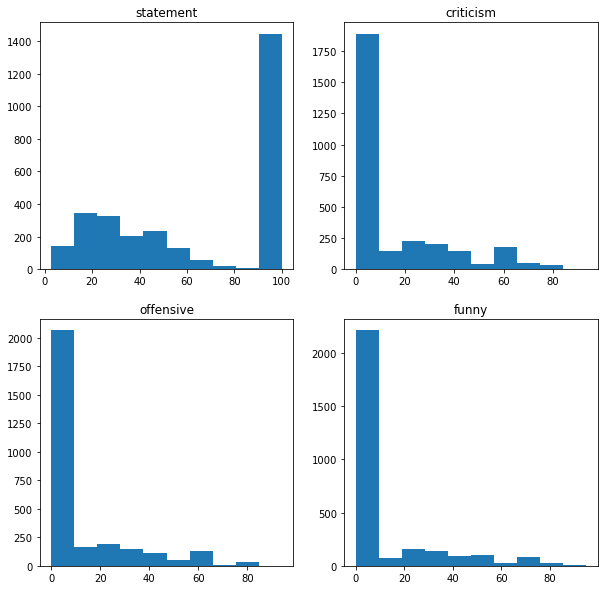

In [ ]:
#using the values of each column,plot 4 graphs where x-axis values are 0-10,10-20,20-30,30-40,40-50,50-60,60-70,70-80,80-90,90-100
#and y-axis values are the number of comments in each range (prep_train)
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.hist(prep_train['statement'],bins=10)
plt.title('statement')
plt.subplot(2,2,2)
plt.hist(prep_train['criticism'],bins=10)
plt.title('criticism')
plt.subplot(2,2,3)
plt.hist(prep_train['offensive'],bins=10)
plt.title('offensive')
plt.subplot(2,2,4)
plt.hist(prep_train['funny'],bins=10)
plt.title('funny')
plt.show()


In [ ]:
prep_train.head()

(2916, 5)

In [ ]:
#if in the statement
statement_df=prep_train[prep_train['statement']!=0]
statement_df.head()


NameError: name 'prep_train' is not defined